In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

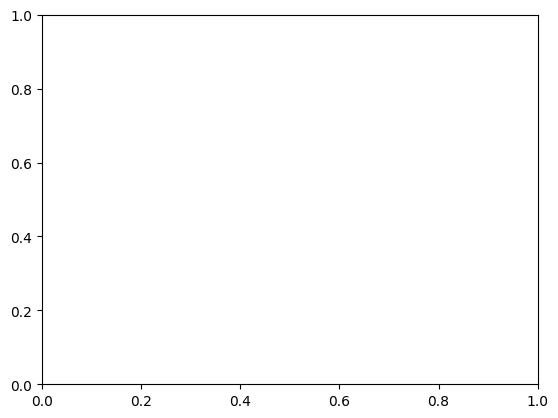

In [30]:
def create_rectangle(x, y, width, height):
    rect=patches.Rectangle((x, y), width, height ,edgecolor='r',facecolor='none')
    return rect


In [ ]:
def create_circle(x, y, radius):
    circle=patches.Circle((x, y), radius ,edgecolor='r',facecolor='none')
    return circle

In [90]:
def create_creases(x,y, radius,circle_begin, circle_end):
    crease=patches.Arc((x,y), radius, radius, angle=0, theta1=circle_begin, theta2=circle_end, color='red')
    return crease

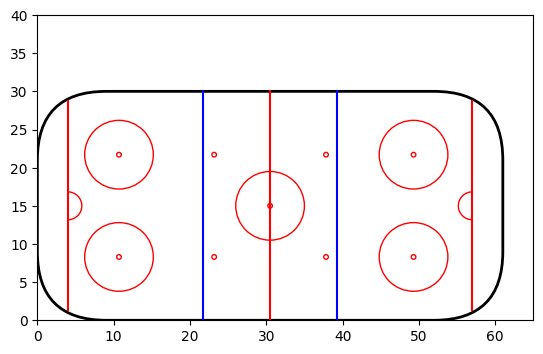

In [91]:
fig, ax = plt.subplots()

rink = patches.FancyBboxPatch(
    (0, 0), 61, 30,
    boxstyle=patches.BoxStyle("Round", pad=0, rounding_size=9),
    edgecolor='black', facecolor='white', lw=2)


ax.add_patch(rink)
#creating all face off circles
ax.add_patch(create_circle(10.7,21.7,4.5)) #face off circle of the left side
ax.add_patch(create_circle(10.7,8.3,4.5))  #//
ax.add_patch(create_circle(49.3,21.7,4.5)) #face off circle on the right side
ax.add_patch(create_circle(49.3,8.3,4.5))  #//
ax.add_patch(create_circle(30.5,15,4.5))   #faceoff circle in the middle

#creating all face off dots
ax.add_patch(create_circle(10.7,21.7,0.3)) #face off circle of the left side
ax.add_patch(create_circle(10.7,8.3,0.3))  #//
ax.add_patch(create_circle(49.3,21.7,0.3)) #face off circle on the right side
ax.add_patch(create_circle(49.3,8.3,0.3))  #//
ax.add_patch(create_circle(23.17,21.7,0.3)) #face off circle in the neutral zone on the left side
ax.add_patch(create_circle(23.17,8.3,0.3))  #//
ax.add_patch(create_circle(37.83,21.7,0.3)) #face off circle in the neutral zone on the right side
ax.add_patch(create_circle(37.83,8.3,0.3))  #//
ax.add_patch(create_circle(30.5,15,0.3))   #faceoff circle in the middle

# Creating the blue lines
ax.plot([21.67, 21.67], [0, 30], color='blue')
ax.plot([39.33, 39.33], [0, 30], color='blue')

# Creating the red lines
ax.plot([30.5, 30.5], [0, 30], color='red')
ax.plot([4, 4], [1.3, 28.7], color='red')
ax.plot([57, 57],[1.3, 28.7], color='red')

# Creating goal creases
ax.add_patch(create_creases(4,15,3.66,-90,90)) #left goal crease
ax.add_patch(create_creases(57,15,3.66,90,-90)) #right goal crease 



ax.set_xlim(0, 65)
ax.set_ylim(0, 40)
ax.set_aspect('equal')
plt.show()

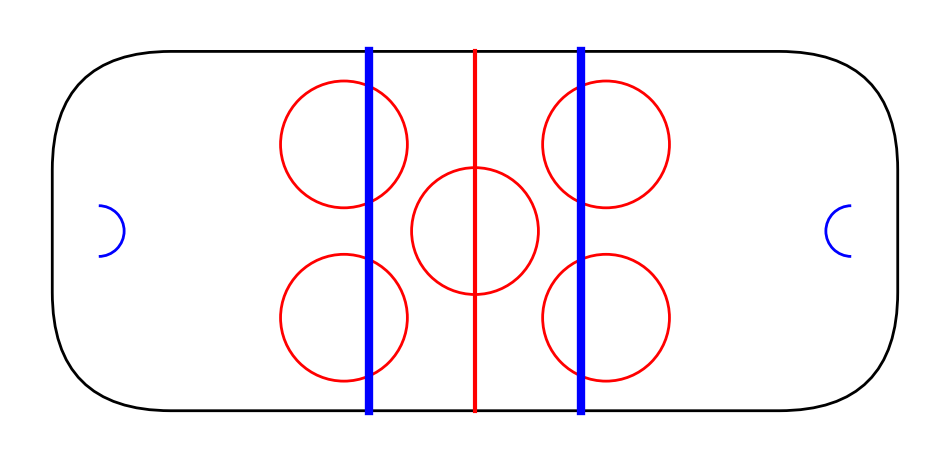

In [44]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def create_rectangle(x, y, width, height, edgecolor='black', facecolor='none', lw=2):
    return patches.Rectangle((x, y), width, height, edgecolor=edgecolor, facecolor=facecolor, lw=lw)

def create_circle(x, y, radius, edgecolor='blue', facecolor='none', lw=2):
    return patches.Circle((x, y), radius, edgecolor=edgecolor, facecolor=facecolor, lw=lw)

fig, ax = plt.subplots(figsize=(12, 6))

# Rink dimensions (NHL standard: 200 ft x 85 ft, but you can use any scale)
rink_length = 200
rink_width = 85
corner_radius = 28

# Rink outline with rounded corners
rink = patches.FancyBboxPatch(
    (0, 0), rink_length, rink_width,
    boxstyle=patches.BoxStyle("Round", pad=0, rounding_size=corner_radius),
    edgecolor='black', facecolor='white', lw=2
)
ax.add_patch(rink)

# Center red line
ax.plot([rink_length/2, rink_length/2], [0, rink_width], color='red', lw=3)

# Blue lines (75 ft from each end, 12 inches wide)
blue_line_width = 1
ax.plot([75, 75], [0, rink_width], color='blue', lw=blue_line_width*6)
ax.plot([125, 125], [0, rink_width], color='blue', lw=blue_line_width*6)

# Goal creases (semi-circles)
crease_radius = 6
ax.add_patch(patches.Arc((11, rink_width/2), 2*crease_radius, 2*crease_radius, theta1=270, theta2=90, color='blue', lw=2))
ax.add_patch(patches.Arc((rink_length-11, rink_width/2), 2*crease_radius, 2*crease_radius, theta1=90, theta2=270, color='blue', lw=2))

# Faceoff circles (radius 15 ft)
faceoff_radius = 15
faceoff_spots = [
    (69, 22), (69, rink_width-22),
    (131, 22), (131, rink_width-22),
    (rink_length/2, rink_width/2)
]
for x, y in faceoff_spots:
    ax.add_patch(create_circle(x, y, faceoff_radius, edgecolor='red'))

# Set limits and aspect
ax.set_xlim(-10, rink_length+10)
ax.set_ylim(-10, rink_width+10)
ax.set_aspect('equal')
ax.axis('off')
plt.show()

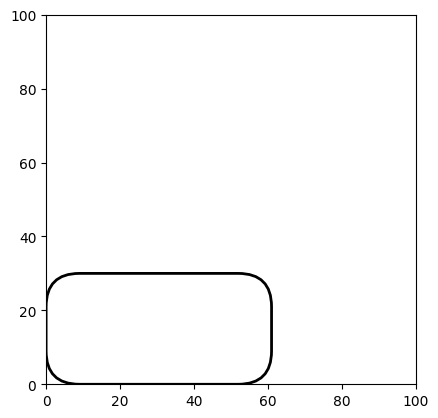

In [45]:
fig, ax = plt.subplots()
rink = patches.FancyBboxPatch(
    (0, 0), 61, 30,
    boxstyle=patches.BoxStyle("Round", pad=0, rounding_size=9),
    edgecolor='black', facecolor='white', lw=2
)
ax.add_patch(rink)
ax.set_xlim(0, 100)
ax.set_ylim(0, 100)
ax.set_aspect('equal')
plt.show()